In [ ]:
hexagons = set(h3.polyfill_geojson(california_geojson, resolution))

# Inicjalizuj listę do przechowywania krawędzi i zestaw do śledzenia przetworzonych krawędzi
edges = []
processed_edges = set()

counter = 0

# Iteruj przez każdy heks, aby znaleźć jego sąsiadów
for hexagon in hexagons:
    counter +=1
    print(f"{counter}/{len(hexagons)}")
    neighbors = h3.hex_ring(hexagon, 1)
    for neighbor in neighbors:
        if neighbor in hexagons:
            edge_key = frozenset([hexagon, neighbor])
            if edge_key not in processed_edges:
                processed_edges.add(edge_key)
                
                # Pobierz krawędź jednokierunkową między heksagonami
                edge = h3.get_h3_unidirectional_edge(hexagon, neighbor)
                
                # Pobierz geometrię krawędzi
                edge_boundary = h3.h3_unidirectional_edge_boundary(edge, geo_json=True)
                
                # Konwertuj geometrię na LineString
                line = LineString(edge_boundary)
                
                # Dodaj dane krawędzi do listy
                edges.append({
                    'from_hex': hexagon,
                    'to_hex': neighbor,
                    'geometry': line
                })

# Utwórz DataFrame z listy krawędzi
edges_df = pd.DataFrame(edges)

# Utwórz GeoDataFrame z DataFrame, określając kolumnę geometryczną
edges_gdf = gpd.GeoDataFrame(edges_df, geometry='geometry', crs="EPSG:4326")

# Opcjonalnie: Wyświetl GeoDataFrame
print(edges_gdf)

1 1215655
2 1215655
3 1215655
4 1215655
5 1215655
6 1215655
7 1215655
8 1215655
9 1215655
10 1215655
11 1215655
12 1215655
13 1215655
14 1215655
15 1215655
16 1215655
17 1215655
18 1215655
19 1215655
20 1215655
21 1215655
22 1215655
23 1215655
24 1215655
25 1215655
26 1215655
27 1215655
28 1215655
29 1215655
30 1215655
31 1215655
32 1215655
33 1215655
34 1215655
35 1215655
36 1215655
37 1215655
38 1215655
39 1215655
40 1215655
41 1215655
42 1215655
43 1215655
44 1215655
45 1215655
46 1215655
47 1215655
48 1215655
49 1215655
50 1215655
51 1215655
52 1215655
53 1215655
54 1215655
55 1215655
56 1215655
57 1215655
58 1215655
59 1215655
60 1215655
61 1215655
62 1215655
63 1215655
64 1215655
65 1215655
66 1215655
67 1215655
68 1215655
69 1215655
70 1215655
71 1215655
72 1215655
73 1215655
74 1215655
75 1215655
76 1215655
77 1215655
78 1215655
79 1215655
80 1215655
81 1215655
82 1215655
83 1215655
84 1215655
85 1215655
86 1215655
87 1215655
88 1215655
89 1215655
90 1215655
91 1215655
92 12156

KeyboardInterrupt: 

<AxesSubplot:>

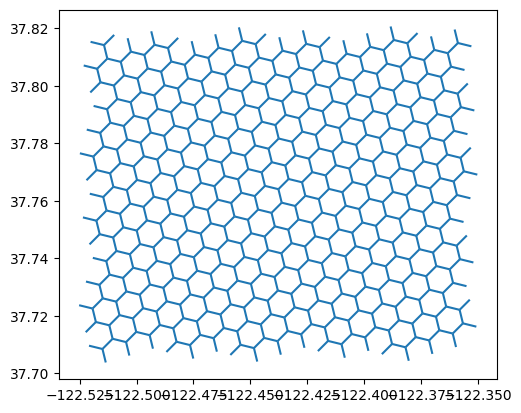

In [25]:
edges_gdf.plot()